<h1>  Tensorflow 2.x Linear Regression from Scratch</h1>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model

print(tf.__version__)


2.1.0


<h2> the Linear Equation: y = mx + b</h2>
let's generate random data with m = 0.2 and b = 0.5

In [29]:
def generate_noisy_data(m=0.2, b= 0.5, n=100):
    x = tf.random.uniform(shape = (n, ))
    noise = tf.random.normal(shape=(len(x), ), stddev = 0.01)
    y = m*x + b + noise
    return x,y

In [30]:
x_train, y_train = generate_noisy_data()

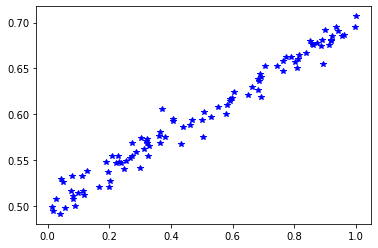

In [31]:
plt.plot(x_train, y_train, 'b*')

In [32]:
m = tf.Variable(0.)
b = tf.Variable(0.)

In [33]:
def predict(x):
    y = m*x + b
    return y

In [34]:
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [35]:
loss = squared_error(predict(x_train), y_train)
loss.numpy()

0.35924378

<h2>GradientTape</h2> 
It's used to compute the derivate.
By default, the resources held by a GradientTape are released as soon as GradientTape.gradient() method is called.
GradientTapes can be nested to compute higher-order derivatives.
https://www.tensorflow.org/api_docs/python/tf/GradientTape


tape.gradient(loss, [m,b]) will give the gradient of m,b with respect to the loss

In [37]:

learning_rate = 0.05
steps = 200

for i in range(steps):
    
    with tf.GradientTape() as tape:
        
        predictions = predict(x_train)
        loss = squared_error(predictions, y_train)
        
    gradients = tape.gradient(loss, [m,b])
   
    m.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)
    
    if i % 20 == 0:
        print("Steps %d, Loss %f" % (i, loss.numpy()))
    

Steps 0, Loss 0.359244
Steps 20, Loss 0.001943
Steps 40, Loss 0.000223
Steps 60, Loss 0.000185
Steps 80, Loss 0.000163
Steps 100, Loss 0.000146
Steps 120, Loss 0.000133
Steps 140, Loss 0.000124
Steps 160, Loss 0.000117
Steps 180, Loss 0.000112


<h3> m and b value</h3>

In [38]:
print('m is : ', m.numpy())
print('b is :', b.numpy())

m is :  0.21125403
b is : 0.4932714


<h2> Plot the Best fitting Line</h2>

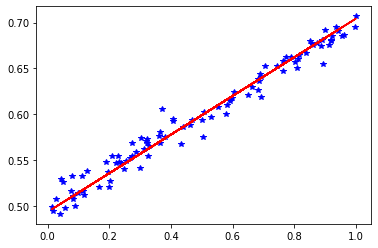

In [39]:
plt.plot(x_train, y_train, 'b*')
plt.plot(x_train, predict(x_train),'r')